# Algorithm 2 Implementation

In [1]:
import pandas as pd
import numpy as np
import timeit 
import matplotlib.pyplot as plt

In [2]:
def Algo2(words, abb, phr): # O(4 + 3n(4m)) = O(4 + 12nm), m = size of abbreviations list = 3356, so its O(4 + 40272n)
    output = []
    added = False
    for w in words:
        added = False
        for i in range(0, len(abb) - 1):
            if (abb[i] == w):
                output.append(phr[i])
                added = True
                break
        if (added == False):
            output.append(w)
    return output

# Setting up the Data

In [3]:
tweetdata = pd.read_csv("com.rockstargames.gtasa.csv")
tweetdata2 = pd.read_csv("com.squareenixmontreal.hitmansniperandroid.csv")
tweetdata3 = pd.read_csv("slide.cameraZoom.csv")
slangdata = pd.read_csv("Slang-dataset/slang.csv")

C:\Users\jerem\AppData\Local\Temp\ipykernel_5520\2242957102.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  tweetdata = pd.read_csv("com.rockstargames.gtasa.csv")


In [4]:
content = tweetdata['content']
content = content.dropna()
tweetlist = content.tolist()
content2 = tweetdata2['content']
content2 = content2.dropna()
tweetlist.extend(content2)
content3 = tweetdata3['content']
content3 = content3.dropna()
tweetlist.extend(content3)
len(tweetlist)


206121

In [5]:
words = []
for string in tweetlist:
    x = string.split()
    words.append(x)


In [6]:
slangdata = slangdata.dropna()
slangdata = slangdata.drop(slangdata[slangdata['acronym'] == 'it'].index)
slangdata = slangdata.drop([1598]).drop([165])
slangdata.reset_index(inplace=True)
slangdict = {}
slangac = slangdata['acronym']
slangexp = slangdata['expansion']
slangabb = []
slangphr = []
for i in range(0, slangac.size - 1):
    slangabb.append(slangac[i])
    slangphr.append(slangexp[i])


# Test

In [7]:
o = []

for i in words[:100]:
    o.append(Algo2(i, slangabb, slangphr))


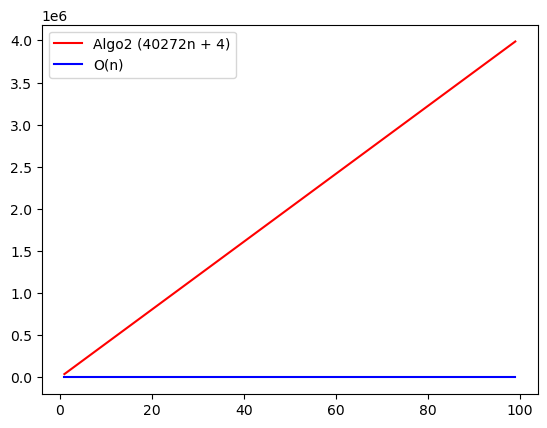

In [8]:
# Plot of Algo2
ns = range(1, 100)
ts = [(40272*n + 4) for n in ns]
plt.plot(ns, ts, '-r', label='Algo2 (40272n + 4)');

ns = range(1,100)
ts = [(n) for n in ns]
plt.plot(ns, ts, '-b', label='O(n)')
plt.legend(loc='upper left')
plt.show()

# Plot of time it takes

435.960791349411


Text(0.5, 1.0, 'Algo2 implementation running time (n = around 200,000)')

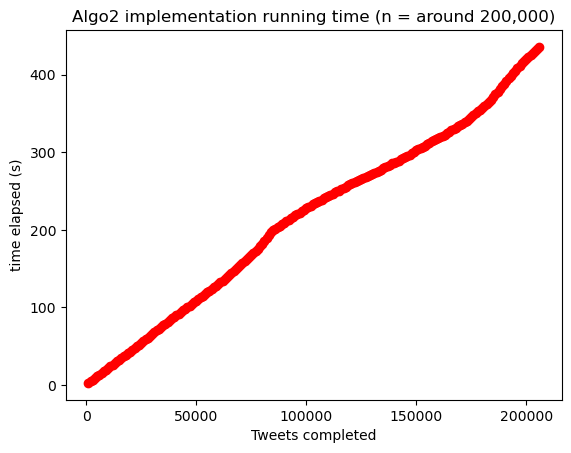

In [9]:
o = []
import time
t1 = time.time()
tweetscompleted = 0
for i in words:
    o.append(Algo2(i, slangabb, slangphr))
    t2 = time.time() - t1
    tweetscompleted = tweetscompleted + 1
    if (tweetscompleted % 1000 == 0):
        ttemp = time.time()
        plt.scatter(x=tweetscompleted, y=t2, color='r')
        ttemp2 = time.time() - ttemp
        t1 = t1 + ttemp2
print(time.time() - t1)
plt.xlabel('Tweets completed')
plt.ylabel('time elapsed (s)')
plt.title('Algo2 implementation running time (n = around 200,000)')